In [85]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, normalize, MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import chi2_contingency

In [111]:
def cv_decision_tree(x, y, kfold):
    clf = DecisionTreeClassifier(random_state=42)
    k_folds = KFold(n_splits = kfold)
    scores = cross_val_score(clf, x, y, cv = k_folds)
    print("Cross Validation Scores: ", scores)
    print('Average CV Score: ',scores.mean())
    print('K-fold: ', kfold)
    # return scores.mean()

In [119]:
df = pd.read_csv('result_after.csv')
df = df.dropna()
X = df.loc[:, df.columns != 'won']
y = df['won']
X = X.drop(['innings_x', 'innings_y', 'overs', 'runs', 'scorecard_no', 'season', 'country_won' ], axis=1)
X.dtypes

ground                      object
countries                   object
team1_inn1                   int64
team2_inn1                   int64
first_inn_lead_of_team1    float64
team1_inn2                   int64
team2_inn2                   int64
team1_inn1_over            float64
team2_inn1_over            float64
total_day                    int64
bat_first                    int64
field_first                  int64
bat_first_country           object
field_first_country         object
team_no                      int64
dtype: object

In [120]:
labelencoder = LabelEncoder()
label_col = ['ground', 'countries', 'bat_first_country', 'field_first_country']
X[label_col] = X[label_col].apply(LabelEncoder().fit_transform)

In [121]:
## label encoder
cv_decision_tree(X, y, 10)

Cross Validation Scores:  [0.5876494  0.56487026 0.56287425 0.61077844 0.61477046 0.61876248
 0.66866267 0.62874251 0.61477046 0.70259481]
Average CV Score:  0.6174475749695828
K-fold:  10


In [122]:
clf = DecisionTreeClassifier(random_state=42)

ss = ShuffleSplit(train_size=0.7, test_size=0.3, n_splits = 10)

scores = cross_val_score(clf, X, y, cv = ss)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.61170213 0.63031915 0.62167553 0.63031915 0.63164894 0.60571809
 0.60704787 0.60305851 0.61236702 0.60771277]
Average CV Score:  0.6161569148936171
Number of CV Scores used in Average:  10


### Important features
1. Separate train and test

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [124]:
## no standard scaler
cv_decision_tree(X_train, y_train, 10)

Cross Validation Scores:  [0.62108262 0.62678063 0.62108262 0.64387464 0.5954416  0.60683761
 0.61538462 0.64       0.6        0.67714286]
Average CV Score:  0.6247627187627187
K-fold:  10


2. Standard scaler

In [125]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

cv_decision_tree(X_train_std, y_train, 10)

Cross Validation Scores:  [0.62108262 0.62678063 0.62393162 0.64387464 0.59259259 0.6011396
 0.61253561 0.64       0.59428571 0.67428571]
Average CV Score:  0.6230508750508751
K-fold:  10


3. Normalization

In [129]:
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
df_norm = pd.DataFrame(scaler.fit_transform(X_train))

cv_decision_tree(df_norm, y_train, 10)

Cross Validation Scores:  [0.62108262 0.62678063 0.62108262 0.64672365 0.59259259 0.6011396
 0.61538462 0.63714286 0.60285714 0.67142857]
Average CV Score:  0.6236214896214898
K-fold:  10


In [132]:
cv_decision_tree(X_train, y_train, 10)

Cross Validation Scores:  [0.62108262 0.62678063 0.62108262 0.64387464 0.5954416  0.60683761
 0.61538462 0.64       0.6        0.67714286]
Average CV Score:  0.6247627187627187
K-fold:  10


C:\Users\ashpl\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: ylabel='Feature'>

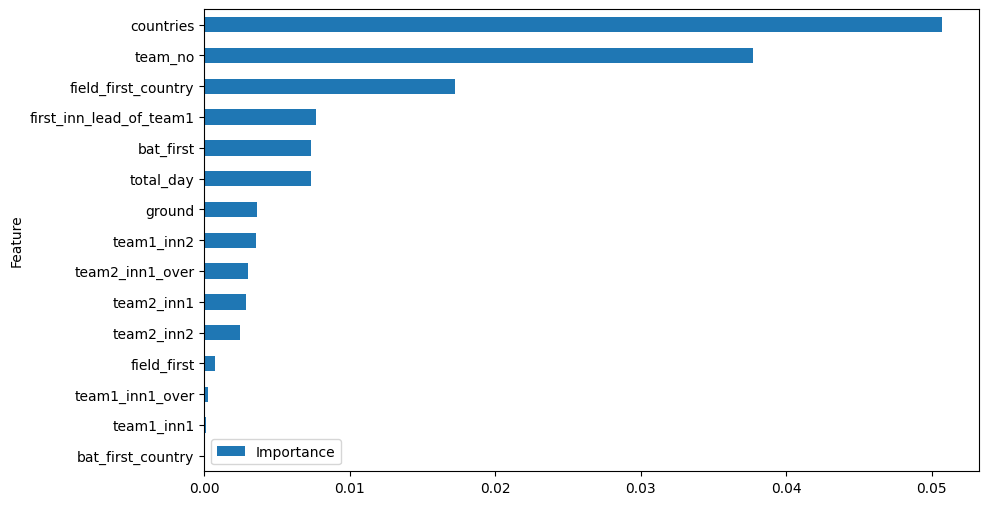

In [133]:
model = LogisticRegression()
model.fit(X_train, y_train)

coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

<Axes: ylabel='Feature'>

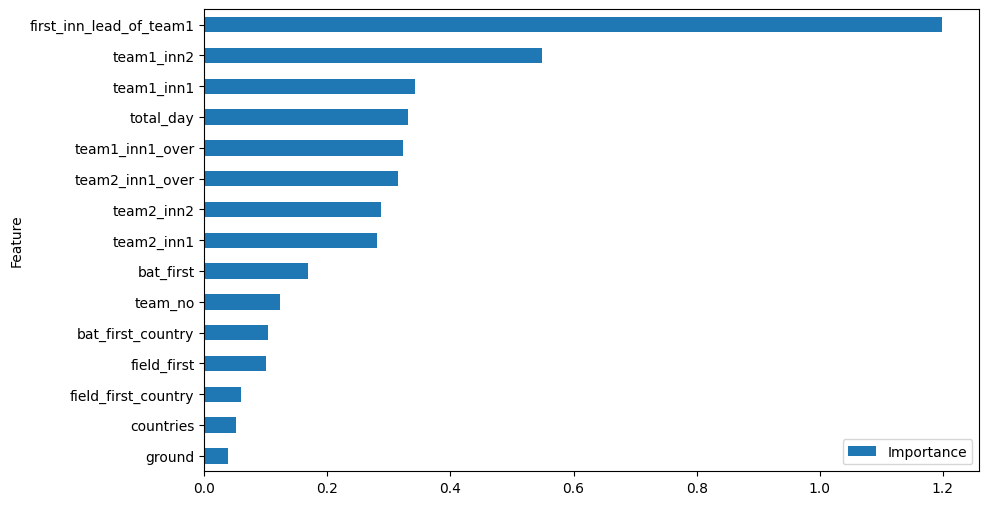

In [134]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

coefficients = model.coef_

avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [136]:
coefficients

array([[ 0.02724124,  0.06644614,  0.01400147, -0.41986523, -1.32344073,
        -0.61982346,  0.17914176, -0.31642601, -0.38611954, -0.1512661 ,
         0.25172596, -0.1494614 , -0.15459382,  0.05068377,  0.18509777],
       [ 0.03060094, -0.07725772, -0.51421166,  0.0202664 ,  1.79871192,
         0.82292553,  0.25268069, -0.1683194 , -0.08512569, -0.34555015,
        -0.04886782,  0.06090907,  0.08037134, -0.08851715, -0.16931887],
       [-0.05784218,  0.01081158,  0.50021019,  0.39959883, -0.47527119,
        -0.20310207, -0.43182245,  0.48474541,  0.47124523,  0.49681625,
        -0.20285815,  0.08855233,  0.07422248,  0.03783338, -0.01577891]])